# HuBMAP - Hacking the Human Vasculature
Segment instances of microvascular structures from healthy human kidney tissue slides.
## Exploratory Data Analysis (EDA)

* Juan González
* Tathiana Cangrejo

In [199]:
# Import librariers
import os
import pandas as pd
import jsonlines
import matplotlib.pyplot as plt
import numpy as np

### Raw data

Data was downloaded with kaggle API for this challenge, this was downloaded as a .zip file that contains:

In [2]:
raw_data_path = os.path.join(os.getcwd().split('notebooks')[0],'data','raw')
content = os.listdir(raw_data_path)
for element in content:
    print(element)

# Function for file with data path
join_path = lambda path1 : os.path.join(raw_data_path,path1)


wsi_meta.csv
.gitkeep
sample_submission.csv
test
polygons.jsonl
tile_meta.csv
hubmap-hacking-the-human-vasculature.zip
train


#### wsi_meta.csv

Metadata for the Whole Slide Images the tiles were extracted from.
* source_wsi Identifies the WSI.
* age, sex, race, height, weight, and bmi demographic information about the tissue donor.

In [3]:
wsi_data = pd.read_csv(join_path(content[0]))
wsi_data

,source_wsi,age,sex,race,height,weight,bmi
0,1,58,F,W,160.0,59.0,23.0
1,2,56,F,W,175.2,139.6,45.5
2,3,73,F,W,162.3,87.5,33.2
3,4,53,M,B,166.0,73.0,26.5


#### sample_submission.csv

A sample submission file in the correct format. This is for kaggle challenge

In [4]:
sample_submission = pd.read_csv(join_path(content[2]))
sample_submission

,id,height,width,prediction_string
0,72e40acccadf,512,512,0 1.0 eNoLTDAwyrM3yI/PMwcAE94DZA==


#### polygons.jsonl

Polygonal segmentation masks in JSONL format, available for Dataset 1 and Dataset 2. Each line gives JSON annotations for a single image with:
* id Identifies the corresponding image in train/
* annotations A list of mask annotations with:
    * type Identifies the type of structure annotated:
        * blood_vessel The target structure: The target structure. Your goal in this competition is to predict these kinds of masks on the test set.
        * glomerulus : A capillary ball structure in the kidney. These parts of the images were excluded from blood vessel annotation. You should ensure none of your test set predictions occur within glomerulus structures as they will be counted as false positives. Annotations are provided for test set tiles in the hidden version of the dataset.
        * unsure : A structure the expert annotators cannot confidently distinguish as a blood vessel.
    * A list of polygon coordinates defining the segmentation mask. 

In [185]:
def get_annotations(id):
    # Open the JSONL file

    with jsonlines.open(join_path('polygons.jsonl')) as reader:
        # Iterate over each line in the file    
        ids = []    
        for line in reader:
            # Process each JSON object
            if id == 'get_values':     
                ids.append(line['id'])                   

            if line['id'] == id:
                return pd.DataFrame(line)
            
        return ids


get_annotations('0006ff2aa7cd')

,id,annotations
0,0006ff2aa7cd,"{'type': 'glomerulus', 'coordinates': [[[167, ..."
1,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[283..."
2,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[104..."
3,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[505..."
4,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[375..."
5,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[368..."
6,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[339..."
7,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[352..."
8,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[227..."


#### tile_meta.csv

Metadata for each image. The hidden version of this file also contains metadata for the test set tiles.
* source_wsi Identifies the WSI this tile was extracted from.
* {i|j} The location of the upper-left corner within the WSI where the tile was extracted.
* dataset The dataset this tile belongs to, as described above.

In [6]:
tile_meta = pd.read_csv(join_path('tile_meta.csv'))
tile_meta.head()

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420
1,000e79e206b7,6,3,10240,29184
2,00168d1b7522,2,2,14848,14884
3,00176a88fdb0,7,3,14848,25088
4,0033bbc76b6b,1,1,10240,43008


#### train/test folders
Contains all images to be used for train/test. Images are in .tif format

Train images :  7033
Test images :  1
Images shape :  (512, 512, 3)


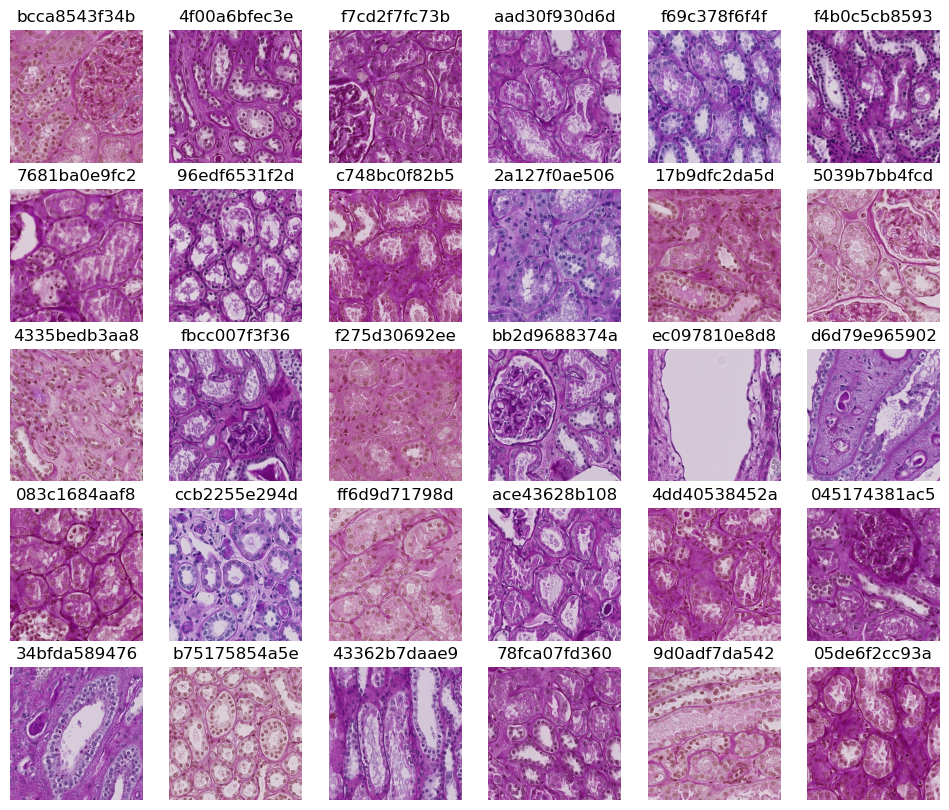

In [7]:
train_files = os.listdir(join_path('train'))
test_files = os.listdir(join_path('test'))

# Plot first 25 images
cols = 5
rows = 6

fig, ax = plt.subplots(cols,rows,figsize = (12,10))

file_counter = 0
for i in range(cols):
    for j in range(rows):
        tmp_img = plt.imread(os.path.join(join_path('train'),train_files[file_counter]))
        ax[i,j].imshow(tmp_img)
        ax[i,j].axis(False)
        ax[i,j].set_title(train_files[file_counter].split('.tif')[0])
        file_counter += 1

# Print number of files
print('Train images : ',len(train_files))
print('Test images : ',len(test_files))

# Print shape of the images
print('Images shape : ', tmp_img.shape)


### Join Images, Annotations and Metadata

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420


,id,annotations
0,0006ff2aa7cd,"{'type': 'glomerulus', 'coordinates': [[[167, ..."
1,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[283..."
2,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[104..."
3,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[505..."
4,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[375..."
5,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[368..."
6,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[339..."
7,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[352..."
8,0006ff2aa7cd,"{'type': 'blood_vessel', 'coordinates': [[[227..."


Text(0.5, 1.0, 'id : 0006ff2aa7cd')

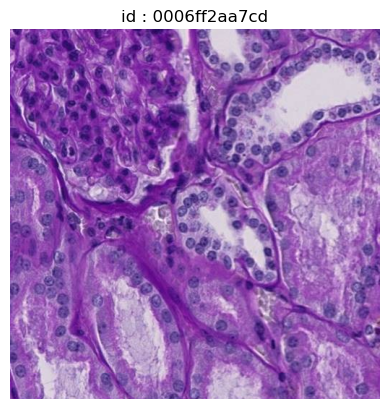

In [194]:
# Get id of files contained on jsonl
names = get_annotations('get_values')

# Get name of file (same as ID)
id = names[0]

# Findo related information on tile_meta
tmp_tm = tile_meta[tile_meta['id'] == id]
display(tmp_tm)

# Get annotations
annotations = get_annotations(id)
display(annotations)

# Show image
img = plt.imread(join_path('train/'+id+'.tif'))
plt.imshow(img)
plt.axis(False)
plt.title('id : '+id)

#### Locate ROI

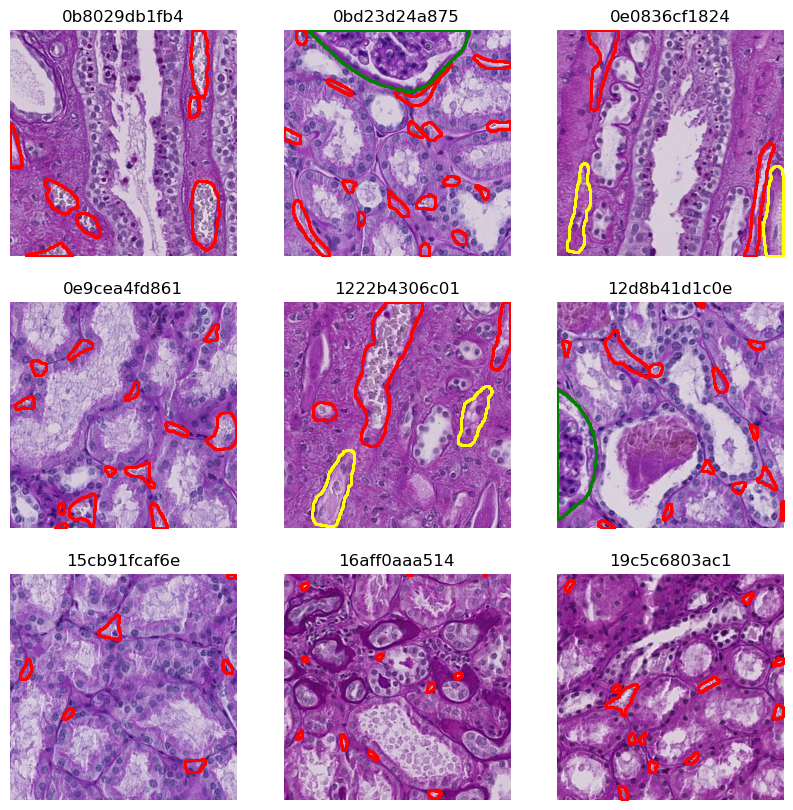

In [222]:
# For the figure
cols = 3
rows = 3

# Initialize figure
fig,ax = plt.subplots(cols,rows, figsize = (10,10))
count = 75

# Get id of files contained on jsonl
names = get_annotations('get_values')

for i in range(cols):
    for j in range(rows):    

        # Get name of file (same as ID)
        id = names[count]

        # Get annotations
        annotations = get_annotations(id)

        # Read on Show image
        img = plt.imread(join_path('train/'+id+'.tif'))
        ax[i,j].imshow(img)

        # Iterate over all elements in annotation data frame
        for index, row in annotations.iterrows():
            
            # Get row anonotations
            tmp_row_ann = row['annotations']

            # Get type of the element
            tmp_type = tmp_row_ann['type']
            
            # Get color depending on the type
            if tmp_type == 'blood_vessel':
                color = 'red'
            elif tmp_type == 'glomerulus':
                color = 'green'
            else:
                color = 'yellow'

            # Get coordinates
            tmp_coords = np.array(tmp_row_ann['coordinates']).squeeze()

            # Plot coordinates
            ax[i,j].scatter(tmp_coords[:,0],tmp_coords[:,1],s = 1,color = color)
            ax[i,j].axis(False)    

            count += 1
        ax[i,j].set_title(id)
